In [22]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns




In [23]:
results = pd.read_csv('results.csv')
shootouts = pd.read_csv('shootouts.csv')
goalscorers = pd.read_csv('goalscorers.csv')


def print_columns(df, name):
    print(f"{name} columns: {df.columns.tolist()}")

print_columns(results, 'results')
print_columns(shootouts, 'shootouts')
print_columns(goalscorers, 'goalscorers')   


results columns: ['date', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament', 'city', 'country', 'neutral']
shootouts columns: ['date', 'home_team', 'away_team', 'winner', 'first_shooter']
goalscorers columns: ['date', 'home_team', 'away_team', 'team', 'scorer', 'minute', 'own_goal', 'penalty']


In [24]:
print(shootouts.head())
print(shootouts.tail())

         date    home_team         away_team       winner first_shooter
0  1967-08-22        India            Taiwan       Taiwan           NaN
1  1971-11-14  South Korea  Vietnam Republic  South Korea           NaN
2  1972-05-07  South Korea              Iraq         Iraq           NaN
3  1972-05-17     Thailand       South Korea  South Korea           NaN
4  1972-05-19     Thailand          Cambodia     Thailand           NaN
           date   home_team    away_team      winner first_shooter
642  2024-07-06     Uruguay       Brazil     Uruguay       Uruguay
643  2024-07-13      Canada      Uruguay     Uruguay        Canada
644  2024-09-08  Tajikistan  Philippines  Tajikistan           NaN
645  2024-09-10    Cambodia    Sri Lanka   Sri Lanka      Cambodia
646  2025-06-08    Portugal        Spain    Portugal      Portugal


In [25]:
print(shootouts.head())
print(shootouts.tail())

         date    home_team         away_team       winner first_shooter
0  1967-08-22        India            Taiwan       Taiwan           NaN
1  1971-11-14  South Korea  Vietnam Republic  South Korea           NaN
2  1972-05-07  South Korea              Iraq         Iraq           NaN
3  1972-05-17     Thailand       South Korea  South Korea           NaN
4  1972-05-19     Thailand          Cambodia     Thailand           NaN
           date   home_team    away_team      winner first_shooter
642  2024-07-06     Uruguay       Brazil     Uruguay       Uruguay
643  2024-07-13      Canada      Uruguay     Uruguay        Canada
644  2024-09-08  Tajikistan  Philippines  Tajikistan           NaN
645  2024-09-10    Cambodia    Sri Lanka   Sri Lanka      Cambodia
646  2025-06-08    Portugal        Spain    Portugal      Portugal


In [26]:
print(goalscorers.head())
print(goalscorers.tail())

         date  home_team away_team       team            scorer  minute  \
0  1916-07-02      Chile   Uruguay    Uruguay   José Piendibene    44.0   
1  1916-07-02      Chile   Uruguay    Uruguay  Isabelino Gradín    55.0   
2  1916-07-02      Chile   Uruguay    Uruguay  Isabelino Gradín    70.0   
3  1916-07-02      Chile   Uruguay    Uruguay   José Piendibene    75.0   
4  1916-07-06  Argentina     Chile  Argentina     Alberto Ohaco     2.0   

   own_goal  penalty  
0     False    False  
1     False    False  
2     False    False  
3     False    False  
4     False    False  
             date  home_team away_team       team            scorer  minute  \
44357  2024-07-13     Canada   Uruguay    Uruguay       Luis Suárez    90.0   
44358  2024-07-14  Argentina  Colombia  Argentina  Lautaro Martínez   112.0   
44359  2024-07-14      Spain   England      Spain     Nico Williams    47.0   
44360  2024-07-14      Spain   England    England       Cole Palmer    73.0   
44361  2024-07-1

In [27]:
# Function to print the shape of the dataframes
def print_shape(df, name):
    print(f"{name} shape: {df.shape}")

print_shape(results, 'results')

results shape: (48335, 9)


In [28]:
# Function to check for null values in the dataframes
def is_null(df):
    print(df.isnull().sum())

is_null(goalscorers)

date           0
home_team      0
away_team      0
team           0
scorer        49
minute       259
own_goal       0
penalty        0
dtype: int64


In [29]:
# Function to call the info method on the dataframes
def print_info(df, name):
    print(f"{name} info: {df.info()}")

print_info(results, 'results')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48335 entries, 0 to 48334
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        48335 non-null  object
 1   home_team   48335 non-null  object
 2   away_team   48335 non-null  object
 3   home_score  48335 non-null  int64 
 4   away_score  48335 non-null  int64 
 5   tournament  48335 non-null  object
 6   city        48335 non-null  object
 7   country     48335 non-null  object
 8   neutral     48335 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 3.0+ MB
results info: None


In [30]:
# Function to call the describe method on the data frames. I rounded the output 2 decimal places for readability.
def print_describe(df, name):
    print(f"{name} describe: {df.describe().round(2)}")

print_describe(results, 'results')
#results.describe()

results describe:        home_score  away_score
count    48335.00    48335.00
mean         1.76        1.18
std          1.77        1.40
min          0.00        0.00
25%          1.00        0.00
50%          1.00        1.00
75%          2.00        2.00
max         31.00       21.00


In [31]:
# Changing the date format to datetime for all dataframes for consistency when joining or merging

results['date'] = pd.to_datetime(results['date'], format='%Y-%m-%d')
shootouts['date'] = pd.to_datetime(shootouts['date'], format= '%Y-%m-%d')
goalscorers['date'] = pd.to_datetime(goalscorers['date'], format='%Y-%m-%d')

#Function to convert a specified column in a DataFrame to datetime format in case I add any dataframes later
def to_datetime(df, column='date', date_format='%Y-%m-%d'):
    """
    Converts a specified column in a DataFrame to datetime format.
    """
    df[column] = pd.to_datetime(df[column], format=date_format)
    return df

In [32]:
# Creating a new dataframe only from the results dataframe to get matches that only involve the FIFA World Cup
results_WC = results[results['tournament'] == 'FIFA World Cup'].copy()
# Extracting the year from the date column to group by year
results_WC['year'] = results_WC['date'].dt.year

"""
Using copy as a suggestion from copilot becuase I got the following warning when I originally ran the code without it:

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

"""

# Combine the home and away teams into one column and keeping the year
teams = pd.concat([
        results_WC[['year', 'home_team']],
        results_WC[['year', 'away_team']].rename(columns={'away_team': 'home_team'})
])
# Counting the number of counturies that participated in each World Cup even for the purposes of displaying the changes on a line graph
countries_count = teams.groupby('year')['home_team'].nunique().reset_index(name='countries_count')

countries_count

,year,countries_count
0,1930,13
1,1934,16
2,1938,15
3,1950,13
4,1954,16
5,1958,16
6,1962,16
7,1966,16
8,1970,16
9,1974,16


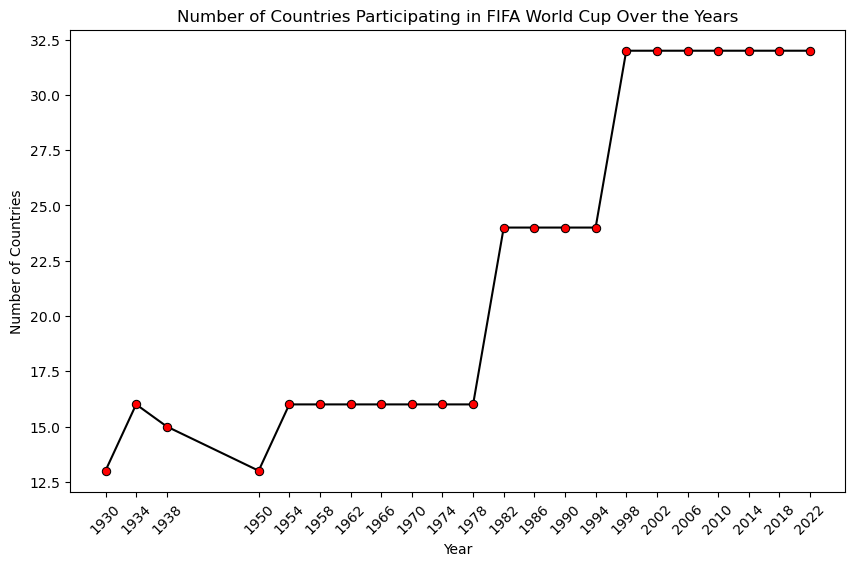

In [33]:
#Create line graph from countries_count dataframe
plt.figure(figsize=(10, 6))
sns.lineplot(data=countries_count, x='year', y='countries_count', color='black', marker='o', markerfacecolor='red', markeredgecolor='black',)
plt.title('Number of Countries Participating in FIFA World Cup Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.xticks(countries_count['year'], rotation=45)
#plt.grid(True)
#plt.tight_layout()
plt.show()

In [34]:
#Join results with shootouts for later analysis.

#Create a SQLite database and store the DataFrames
conn = sqlite3.connect('your_database.db')
results.to_sql('results', conn, if_exists='replace', index=False)
shootouts.to_sql('shootouts', conn, if_exists='replace', index=False)

#SQL query to join results with shootouts
#Originally had trouble joining the tables due to different date formats, but figured it out when meeting with a mentor.
results_join = """SELECT *
FROM results
INNER JOIN shootouts
ON results.date = shootouts.date;
"""

#Execute the query and load the results into a DataFrame
df_results_join = pd.read_sql_query(results_join, conn)
print(df_results_join.head())
conn.close()


                  date  home_team         away_team  home_score  away_score  \
0  1967-08-22 00:00:00    Myanmar  Vietnam Republic           3           0   
1  1967-08-22 00:00:00      India            Taiwan           1           1   
2  1967-08-22 00:00:00     Mexico         Argentina           2           1   
3  1971-11-14 00:00:00    Albania            Turkey           3           0   
4  1971-11-14 00:00:00  Australia            Israel           1           0   

                tournament          city    country  neutral  \
0       Merdeka Tournament  Kuala Lumpur   Malaysia        1   
1       Merdeka Tournament  Kuala Lumpur   Malaysia        1   
2                 Friendly   Mexico City     Mexico        0   
3  UEFA Euro qualification        Tirana    Albania        0   
4                 Friendly        Sydney  Australia        0   

                  date    home_team         away_team       winner  \
0  1967-08-22 00:00:00        India            Taiwan       Taiwan   


In [35]:
print(df_results_join.tail(15))

                     date             home_team     away_team  home_score  \
4103  2024-09-10 00:00:00             Venezuela       Uruguay           0   
4104  2024-09-10 00:00:00              Paraguay        Brazil           1   
4105  2024-09-10 00:00:00           North Korea         Qatar           2   
4106  2024-09-10 00:00:00            Kyrgyzstan    Uzbekistan           2   
4107  2024-09-10 00:00:00  United Arab Emirates          Iran           0   
4108  2024-09-10 00:00:00                  Oman   South Korea           1   
4109  2024-09-10 00:00:00                Kuwait          Iraq           0   
4110  2024-09-10 00:00:00             Palestine        Jordan           1   
4111  2024-09-10 00:00:00               Bahrain         Japan           0   
4112  2024-09-10 00:00:00             Indonesia     Australia           0   
4113  2024-09-10 00:00:00              China PR  Saudi Arabia           1   
4114  2025-06-08 00:00:00               Germany        France           0   

In [36]:
# Create a new SQLite connection and dataframe using the results and shootouts tables with only matches from FIFA World Cup matches.
conn = sqlite3.connect('your_database.db')
results.to_sql('results', conn, if_exists='replace', index=False)
shootouts.to_sql('shootouts', conn, if_exists='replace', index=False)


results_WC = """SELECT results.date AS match_date,
    results.home_team,
    results.away_team,
    results.home_score,
    results.away_score,
    results.tournament,
    shootouts.winner
FROM results
LEFT JOIN shootouts
ON results.date = shootouts.date
WHERE results.tournament = 'FIFA World Cup';
"""

df_WC = pd.read_sql_query(results_WC, conn)
print(df_WC.head())

conn.close()

#convert the date column to datetime
df_WC['match_date'] = pd.to_datetime(df_WC['match_date'], errors='coerce')

            match_date  home_team      away_team  home_score  away_score  \
0  1930-07-13 00:00:00    Belgium  United States           0           3   
1  1930-07-13 00:00:00     France         Mexico           4           1   
2  1930-07-14 00:00:00     Brazil     Yugoslavia           1           2   
3  1930-07-14 00:00:00       Peru        Romania           1           3   
4  1930-07-15 00:00:00  Argentina         France           1           0   

       tournament winner  
0  FIFA World Cup   None  
1  FIFA World Cup   None  
2  FIFA World Cup   None  
3  FIFA World Cup   None  
4  FIFA World Cup   None  


In [37]:
#This was the suggestion from copilot - 
country_counts = df_WC['home_team'].value_counts().add(df_WC['away_team'].value_counts(), fill_value=0)
country_count = df_WC['home_team'].nunique() + df_WC['away_team'].nunique()
print(f"Total number of unique countries in FIFA World Cup matches: {country_count}")
print("Number of matches per country:")
print(country_counts.sort_values(ascending=False).head(10))

Total number of unique countries in FIFA World Cup matches: 159
Number of matches per country:
Brazil         116.0
Germany        113.0
Argentina       89.0
Italy           83.0
France          74.0
England         74.0
Spain           68.0
Mexico          61.0
Uruguay         59.0
Netherlands     56.0
Name: count, dtype: float64


C:\Users\jander7\AppData\Local\Temp\ipykernel_5944\1358977926.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 30)(np.arange(30))  # Use a valid colormap


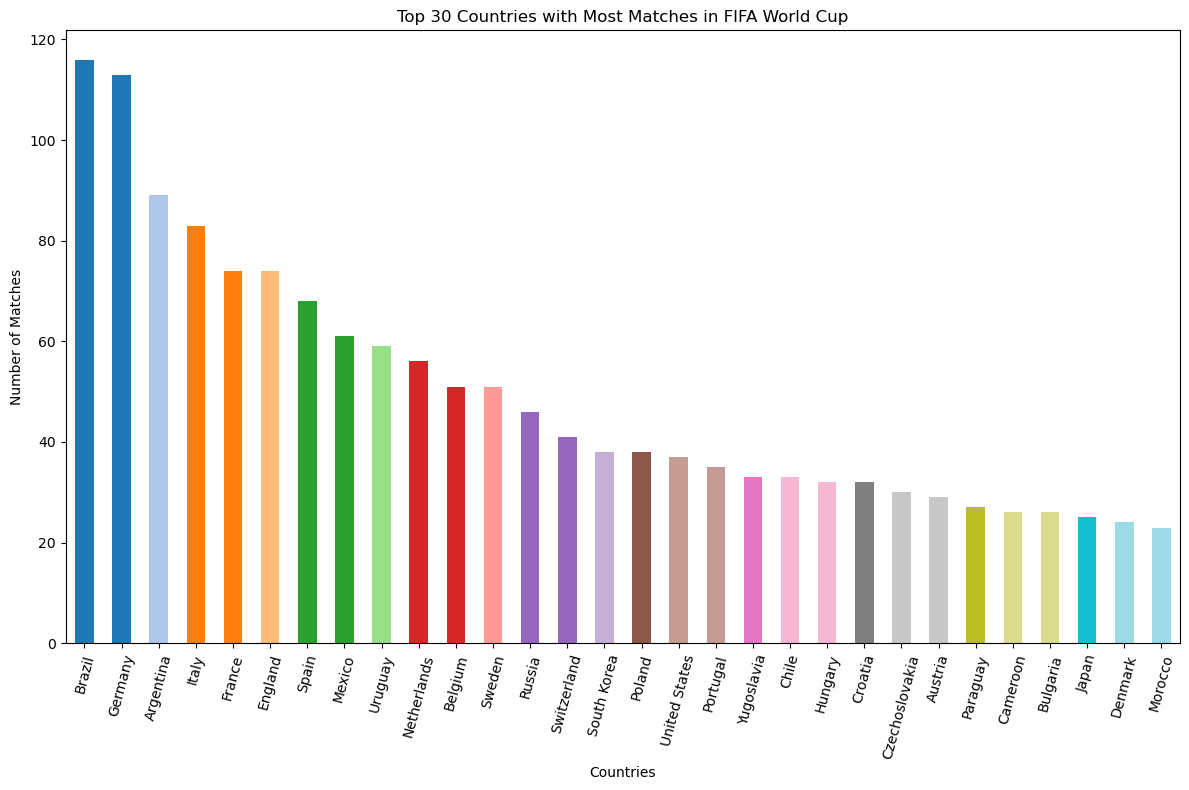

In [38]:
#Plotting the top 30 countries with the most matches in FIFA World Cup
#There are 30 countries in this graph to capture a couple countries that no longer exist (Czechoslovakia and Yugoslavia)
"""
The three lines below were suggest by copilot in addition to the plotting code beneath the comment.
plt.style.use('ggplot')
country_counts = df_WC['home_team'].value_counts().add(df_WC['away_team'].value_counts(), fill_value=0)
print(country_counts.sort_values(ascending=False).head(10))
"""

plt.figure(figsize=(12, 8))
top_countries = country_counts.sort_values(ascending=False).head(30)

#colors = cm.get_cmap('viridis', 30)  # Get a colormap with 30 distinct colors
colors = cm.get_cmap('tab20', 30)(np.arange(30))  # Use a valid colormap

top_countries.plot(kind='bar', color=colors)
plt.title('Top 30 Countries with Most Matches in FIFA World Cup')
plt.xlabel('Countries')
plt.ylabel('Number of Matches')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

In [39]:
# Function to get match results by country - This was suggested by copilot
def get_match_results_by_country(country):
    """
    Returns the match results for a specific country in FIFA World Cup matches.
    """
    country_results = df_WC[(df_WC['home_team'] == country) | (df_WC['away_team'] == country)]
    return country_results

get_match_results_by_country('United States')  # Example usage to get results for Brazil

,match_date,home_team,away_team,home_score,away_score,tournament,winner
0,1930-07-13,Belgium,United States,0,3,FIFA World Cup,None
7,1930-07-17,Paraguay,United States,0,3,FIFA World Cup,None
15,1930-07-26,Argentina,United States,6,1,FIFA World Cup,None
24,1934-05-27,Italy,United States,7,1,FIFA World Cup,None
56,1950-06-25,Spain,United States,3,1,FIFA World Cup,None
61,1950-06-29,England,United States,0,1,FIFA World Cup,None
65,1950-07-02,Chile,United States,5,2,FIFA World Cup,None
420,1990-06-10,United States,Czechoslovakia,1,5,FIFA World Cup,None
428,1990-06-14,Italy,United States,1,0,FIFA World Cup,None
440,1990-06-19,Austria,United States,2,1,FIFA World Cup,None


In [40]:
# Creating a new dataframe only from the results dataframe 

def get_match_results(row):

    #Determin match outcomes, including shootouts
    if row['home_score'] > row['away_score']:
        return pd.Series({'home_result' : 'Win', 'away_result' : 'Loss'})
    elif row['home_score'] < row['away_score']:
        return pd.Series({'home_result' : 'Loss', 'away_result' : 'Win'})
    else:
        # Draw in regular time; check for shootout
        if pd.notna(row['winner']):
            if row['home_score'] == row['home_team']:
                return pd.Series({'home_result': 'Win', 'away_result': 'Loss'})
            elif row['winner'] == row['away_team']:
                return pd.Series({'home_result': 'Loss', 'away_result': 'Win'})
        return pd.Series({'home_result': 'Draw', 'away_result': 'Draw'})

# Apply the function to create result columns
df_WC[['home_result', 'away_result']] = df_WC.apply(get_match_results, axis=1)
df_WC['year'] = df_WC['match_date'].dt.year


# Reshape the data by creating new dataframs for home and away teams for each team's perspective in order to analyze records by country
home_df_WC = df_WC[['year', 'home_team', 'home_result']].copy() # .copy() came from copilot and I was not aware of this feature
home_df_WC.columns = ['year', 'team', 'result']
away_df_WC = df_WC[['year', 'away_team', 'away_result']].copy()
away_df_WC.columns = ['year', 'team', 'result']
combined_df_WC = pd.concat([home_df_WC, away_df_WC], ignore_index=True)


# Aggregate the results
records = combined_df_WC.groupby(['team', 'year', 'result']).size().unstack(fill_value=0).reset_index()
records = records.reindex(columns=['team', 'year', 'Win', 'Loss', 'Draw'], fill_value=0) #reindexing to ensure all columns are present, this was from copilot.
records = records.reset_index()#.rename(columns={'team': 'Country'})

US_records = records[records['team'] == 'United States']
print(US_records)

result  index           team  year  Win  Loss  Draw
454       454  United States  1930    2     1     0
455       455  United States  1934    0     1     0
456       456  United States  1950    1     2     0
457       457  United States  1990    0     3     0
458       458  United States  1994    1     2     1
459       459  United States  1998    0     3     0
460       460  United States  2002    2     2     1
461       461  United States  2006    0     2     1
462       462  United States  2010    1     1     2
463       463  United States  2014    1     2     1
464       464  United States  2022    1     1     2


In [41]:
#Average number of shootouts per World Cup
# Co Pilot suggestion - average_shootouts = df_WC['match_date'].dt.year.value_counts().mean()
average_shootouts = df_WC['match_date'].dt.year.value_counts().mean()
print(f"Average number of shootouts per World Cup: {average_shootouts:.2f}")

# Group by year and count the number of shootouts
shootouts_per_year = df_WC['match_date'].dt.year.value_counts().sort_index()
print(f"Number of shootouts per World Cup year:")
print(shootouts_per_year)


Average number of shootouts per World Cup: 44.09
Number of shootouts per World Cup year:
match_date
1930    18
1934    17
1938    18
1950    22
1954    26
1958    35
1962    32
1966    32
1970    32
1974    38
1978    38
1982    52
1986    54
1990    52
1994    52
1998    64
2002    64
2006    64
2010    64
2014    64
2018    66
2022    66
Name: count, dtype: int64


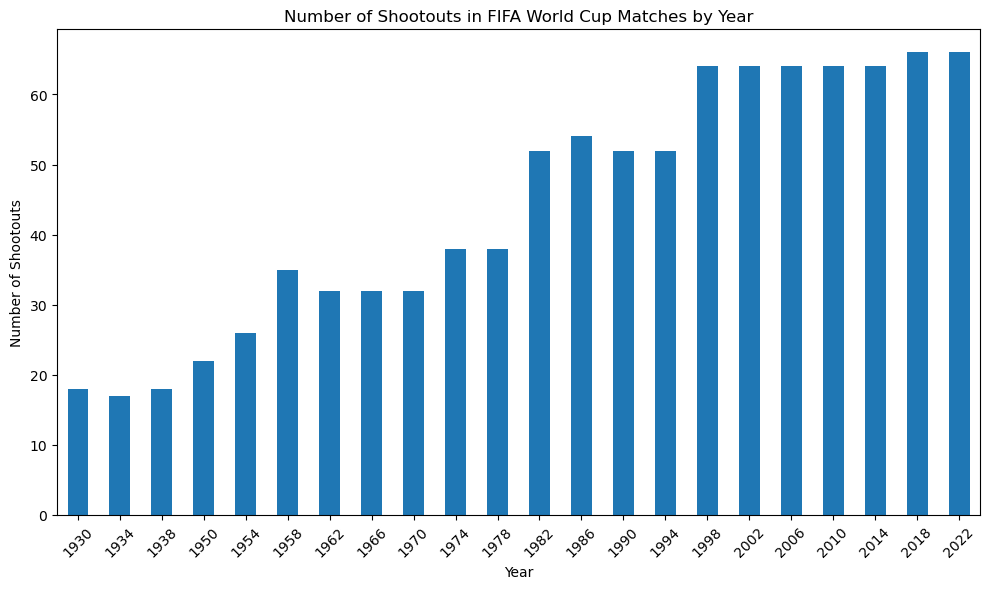

In [42]:
#df_WC is a joined table of shootouts and results that only include World Cup matches



# Bar graph plotting the number of shootouts per year in World Cup matches.
df_WC['year'] = df_WC['match_date'].dt.year
plt.figure(figsize=(10, 6))
df_WC['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Shootouts in FIFA World Cup Matches by Year')
plt.xlabel('Year')
plt.ylabel('Number of Shootouts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('shootouts_per_year.png')
plt.show()